In [15]:
library('tidyverse')

In [3]:
measles_data = read_csv(
    'https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2020/2020-02-25/measles.csv',
    col_types = cols()
)

In [4]:
measles_data |> head()

index,state,year,name,type,city,county,district,enroll,mmr,overall,xrel,xmed,xper,lat,lng
<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<lgl>,<dbl>,<dbl>,<dbl>,<lgl>,<dbl>,<dbl>,<dbl>,<dbl>
1,Arizona,2018-19,A J Mitchell Elementary,Public,Nogales,Santa Cruz,NA,51,100,-1,NA,NA,NA,31.34782,-110.9380
2,Arizona,2018-19,Academy Del Sol,Charter,Tucson,Pima,NA,22,100,-1,NA,NA,NA,32.22192,-110.8961
3,Arizona,2018-19,Academy Del Sol - Hope,Charter,Tucson,Pima,NA,85,100,-1,NA,NA,NA,32.13049,-111.1170
4,Arizona,2018-19,Academy Of Mathematics And Science South,Charter,Phoenix,Maricopa,NA,60,100,-1,NA,NA,NA,33.48545,-112.1306
5,Arizona,2018-19,Acclaim Academy,Charter,Phoenix,Maricopa,NA,43,100,-1,NA,2.33,2.33,33.49562,-112.2247
6,Arizona,2018-19,Alfred F Garcia,Public,Phoenix,Maricopa,NA,36,100,-1,NA,NA,NA,33.43532,-112.1168


In [5]:
az_measles = measles_data |>
    filter(mmr >= 0) |>
    filter(state == 'Arizona') 

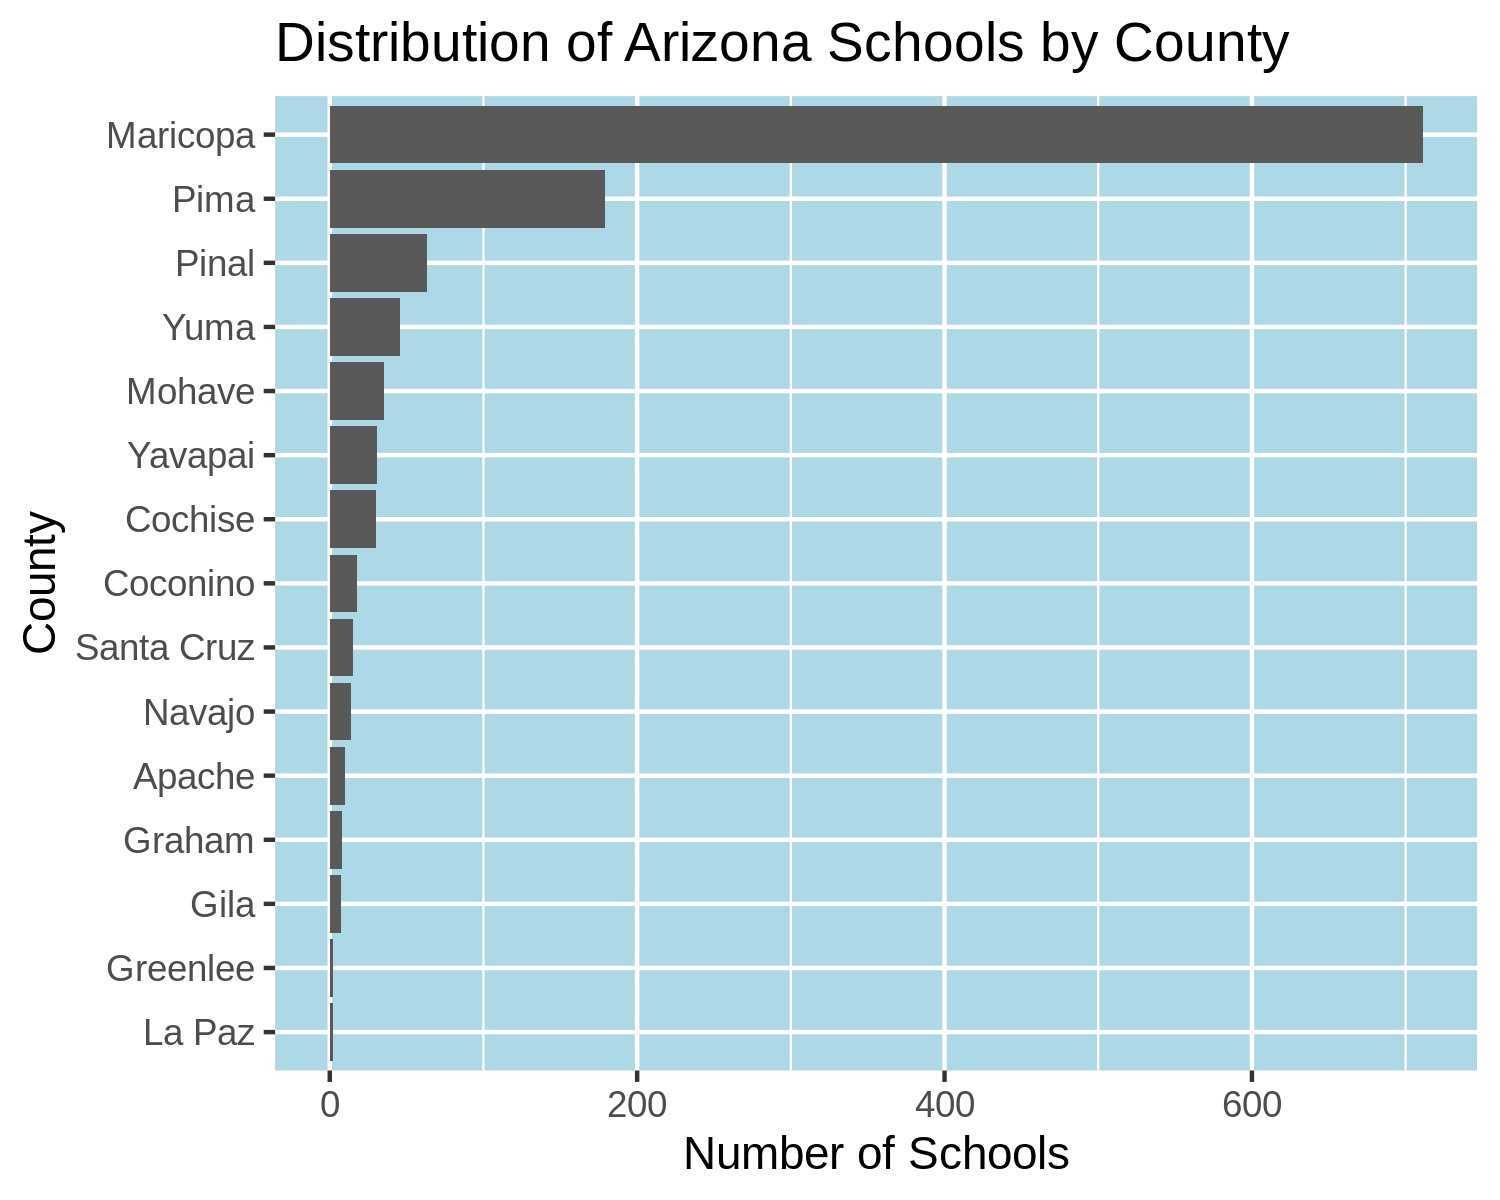

In [13]:
measles_sorted = az_measles %>%
    mutate(county_sorted = county %>% fct_infreq() %>% fct_rev())

p = ggplot(measles_sorted, aes(x = county_sorted))

p = p + geom_bar() + 
coord_flip() + 
labs(y = "Number of Schools", x = "County") +
ggtitle("Distribution of Arizona Schools by County") + 
theme(panel.background = element_rect(fill = 'lightblue'))

p

#### The figure above depicts the distribution of the reported schools in Arizona by county. The majority of schools are in Maricopa County, although there are 14 other counties involved in the dataset. Throughout this project, I aim to look at the mmr vaccination rates in Arizona schools and how they relate to the type of institution (public, private, or charter). Before getting into those ideas, I believe it is important to analyze the plot above because schools that fall in the same county, regardless of type, may have similar resources, and thus similar access to vaccines.

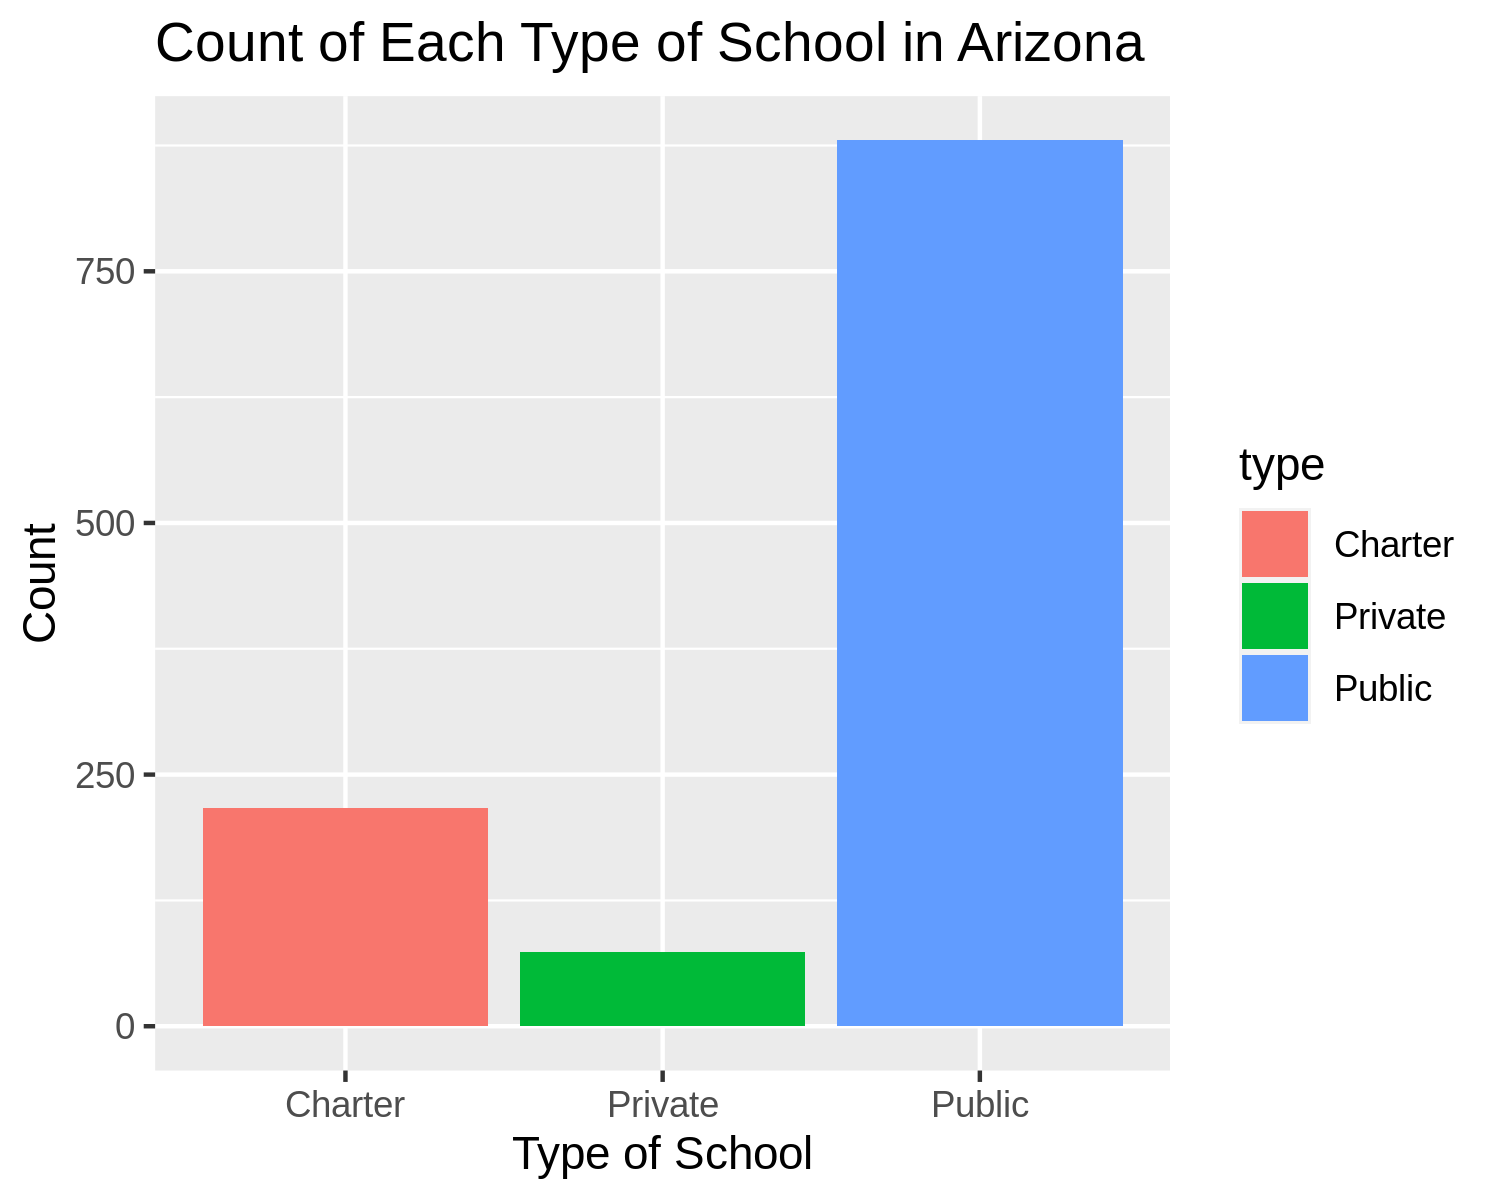

In [6]:
p = ggplot(az_measles, aes(x = type,fill=type))

p = p + geom_bar() + 
labs(y = "Count", x = "Type of School") +
ggtitle("Count of Each Type of School in Arizona")

p

#### The plot above illustrates the number of each type of school that is reported in my data set. I am focusing on the state of Arizona in particular, so these numbers only reflect the numbers in this state. I want to look at the vaccination rates throughout the state and I feel that it is important to know this demographic. The type of school usually reflects the socioeconomic status of their students, as private and charter schools are far more expensive than public schools. This relates to vaccination rates, since having access to more money may mean that students also have access to healthcare advantages, such as vaccines. In this chart, it is clear that most students attend public schools, and the least amount of students attend private schools.

In [7]:
type_rates = az_measles |>
    filter(mmr >= 0) |>
    group_by(type) |>
    summarize(sum = sum(mmr >= 95, na.rm = TRUE), vacc_rates_95 = sum(mmr >= 95, na.rm = TRUE) / n())

type_rates 

type,sum,vacc_rates_95
<chr>,<int>,<dbl>
Charter,58,0.2672811
Private,34,0.4594595
Public,501,0.5693182


In [8]:
utah_measles = measles_data |>
        filter(mmr >= 0) |>
        filter(state == "Utah")

In [9]:
type_rates_ut = utah_measles |>
    filter(mmr >= 0) |>
    group_by(type) |>
    summarize(sum = sum(mmr >= 95, na.rm = TRUE), vacc_rates_95_ut = sum(mmr >= 95, na.rm = TRUE) / n())

type_rates_ut

type,sum,vacc_rates_95_ut
<chr>,<int>,<dbl>
Private,17,0.5151515
Public,393,0.6894737


#### I created a dataset that depicts the mmr vaccination rates for each type of school in Arizona, called type_rates. Contrary to what I originally believed, public schools had the highest rate of mmr vaccination, followed by private schools, and then charter schools. This might be due to increased state and local government control over public institutions. I thought it would be interesting to then compare these rates to Utah, which borders Arizona. Utah has a smaller number of public and private schools, and no charter schools. Despite this, both their public and private school rate of vaccination were higher than those of Arizona's.